### Linear regression

Linear regression is a statistical method used to model the relationship between two variables by fitting a straight line to the data. It predicts the value of one variable based on the value of another, using the equation of a straight line

(y = mx + b), where "m" is the slope and "b" is the y-intercept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### File Description

This CSV file contains health insurance data used to analyze and predict medical insurance charges based on personal and lifestyle factors. The dataset is commonly used for Linear Regression projects to study how different variables affect insurance costs.

### Column Description

age: Age of the individual in years.

sex: Gender of the individual (male or female).

bmi: Body Mass Index, measuring body fat based on height and weight.

children: Number of dependent children covered by insurance.

smoker: Indicates whether the individual is a smoker (yes or no).

region: Residential area of the individual (northeast, northwest, southeast, southwest).

charges: Medical insurance cost charged to the individual.

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### EDA

In [69]:
df.shape

(1338, 7)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
numeric_columns = ['age', 'bmi', 'children','expenses']

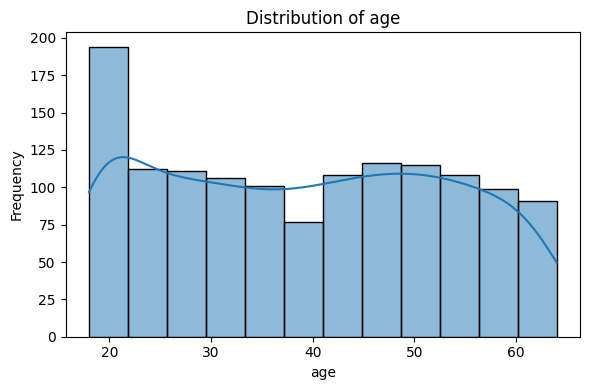

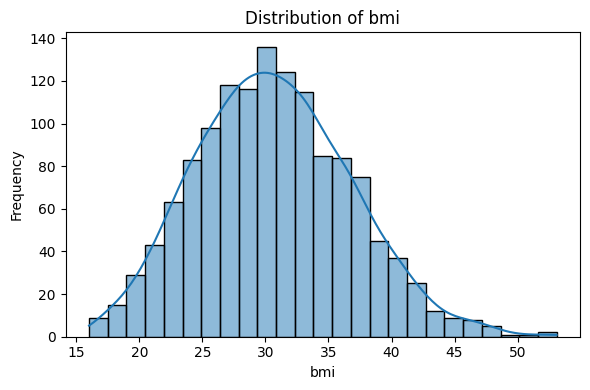

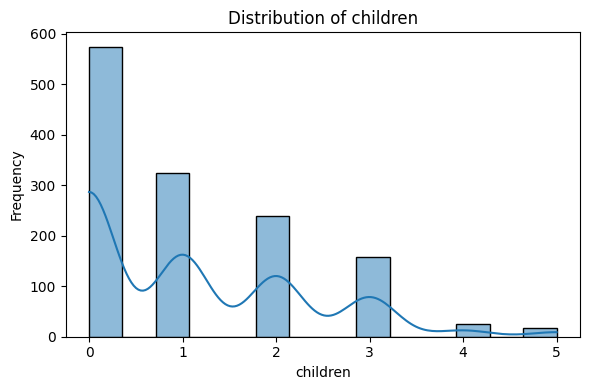

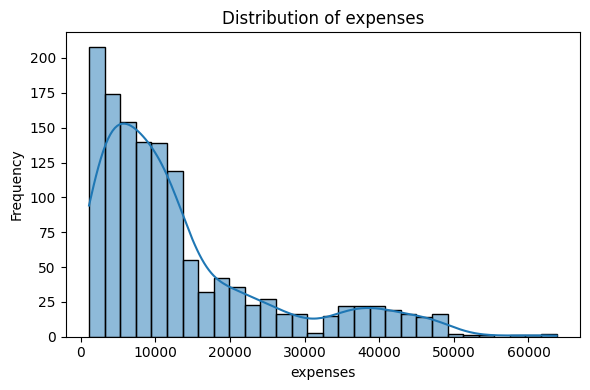

In [7]:
for cols in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[cols], kde = True)
    plt.title(f'Distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='children', ylabel='count'>

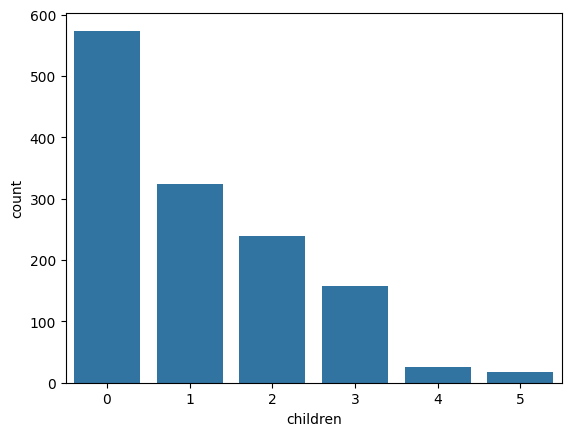

In [8]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

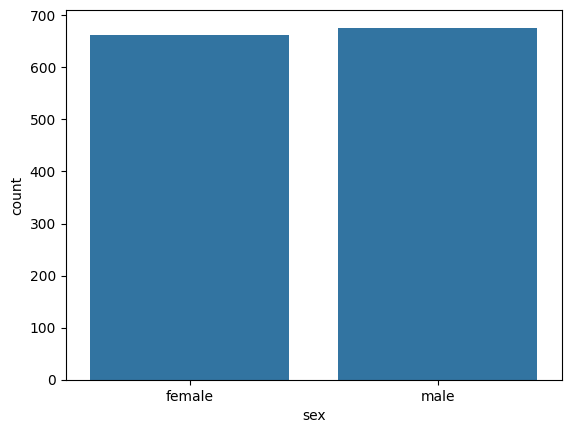

In [9]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

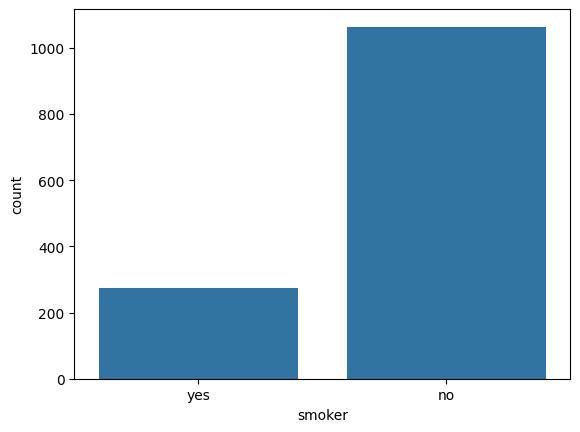

In [10]:
sns.countplot(x=df['smoker'])

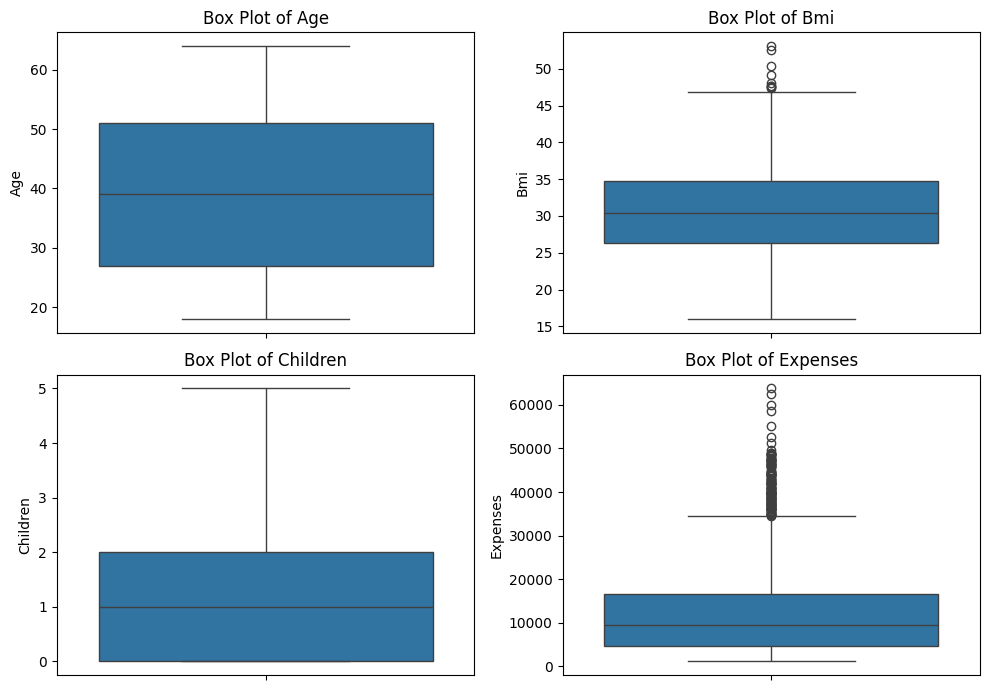

In [11]:
plt.figure(figsize=(10,7))
for i, cols in enumerate(numeric_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[cols])
    plt.title(f'Box Plot of {cols.capitalize()}')
    plt.ylabel(cols.capitalize())
plt.tight_layout()
plt.show()

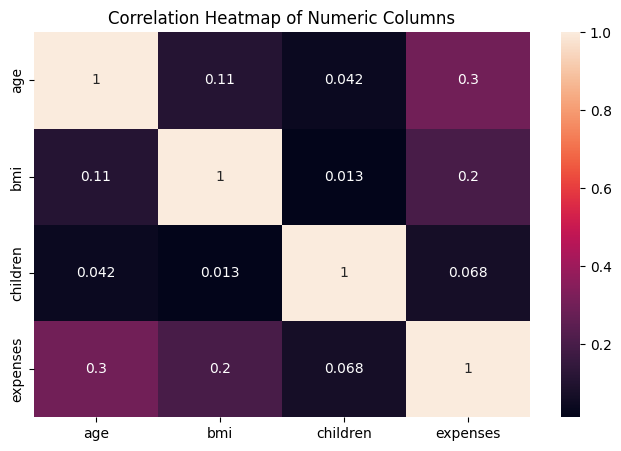

In [12]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [13]:
df_cleaned = df.copy()

In [14]:
df_cleaned.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


### Label Encoding: 
It is a technique that converts categorical text values into numeric labels (e.g., Male → 0, Female → 1) so ML models can process them.

In [ ]:

df_cleaned['sex'] = df_cleaned['sex'].map({'male':0,'female':1})
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no':0,'yes':1})

In [16]:
df_cleaned.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55


### One-Hot Encoding (Region): 
It converts the region column into multiple binary columns (0/1) like region_northwest, region_southeast, region_southwest, etc.,
where 1 means that region is present and 0 means not present.

In [17]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'])

In [18]:
df_cleaned = df_cleaned.astype(int)

In [19]:
df_cleaned.head(3)

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0


<Axes: xlabel='bmi', ylabel='Count'>

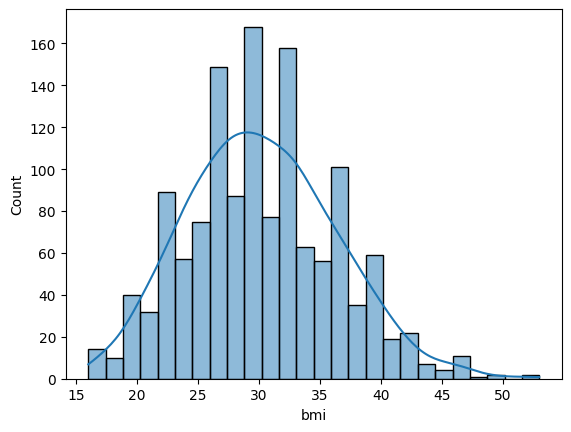

In [20]:
sns.histplot(df_cleaned['bmi'],kde=True)

In [27]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'],bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                    labels=['Underweight', 'Normal', 'Overweight', 'Obese' ])

In [28]:
df_cleaned.head(5)

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,False,False,True,False,Overweight
1,18,0,33,1,0,1725,0,0,1,0,False,False,False,True,Obese
2,28,0,33,3,0,4449,0,0,1,0,False,False,False,True,Obese
3,33,0,22,0,0,21984,0,1,0,0,False,True,False,False,Normal
4,32,0,28,0,0,3866,0,1,0,0,False,False,True,False,Overweight


In [29]:
df_cleaned = pd.get_dummies(df_cleaned, columns=["bmi_category"])

In [30]:
df_cleaned.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,0,1,False,False,True,False,False,False,True,False
1,18,0,33,1,0,1725,0,0,1,0,False,False,False,True,False,False,False,True
2,28,0,33,3,0,4449,0,0,1,0,False,False,False,True,False,False,False,True
3,33,0,22,0,0,21984,0,1,0,0,False,True,False,False,False,True,False,False
4,32,0,28,0,0,3866,0,1,0,0,False,False,True,False,False,False,True,False


In [31]:
df_cleaned = df_cleaned.astype(int)

In [32]:
df_cleaned.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0,0,0,1,0


### Standardization :

Standardization is a data preprocessing technique that rescales variables so they have a mean of 0 and a standard deviation of 1. In Python, it is commonly done using StandardScaler from scikit-learn:

from sklearn.preprocessing import StandardScaler

This helps make features comparable and improves the performance of many machine learning models.

In [37]:
from sklearn.preprocessing import StandardScaler
col_to_scale = ['age','bmi','children']
scaler = StandardScaler()
df_cleaned[col_to_scale] = scaler.fit_transform(df_cleaned[col_to_scale])

In [38]:
df_cleaned.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.438764,1,-0.524492,-0.908614,1,16884,0,0,0,1,0,0,1,0,0,0,1,0
1,-1.509965,0,0.457692,-0.078767,0,1725,0,0,1,0,0,0,0,1,0,0,0,1
2,-0.797954,0,0.457692,1.580926,0,4449,0,0,1,0,0,0,0,1,0,0,0,1
3,-0.441948,0,-1.342979,-0.908614,0,21984,0,1,0,0,0,1,0,0,0,1,0,0
4,-0.513149,0,-0.360795,-0.908614,0,3866,0,1,0,0,0,0,1,0,0,0,1,0


In [39]:
selected_features = [
    'age', 'bmi', 'children', 'sex', 'smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [40]:
final_df = df_cleaned[['age', 'sex', 'bmi', 'children', 'smoker', 'expenses','region_southeast','bmi_category_Obese','region_northwest']]

In [41]:
final_df.head()

,age,sex,bmi,children,smoker,expenses,region_southeast,bmi_category_Obese,bmi_category_Obese,region_northwest
0,-1.438764,1,-0.524492,-0.908614,1,16884,0,0,0,0
1,-1.509965,0,0.457692,-0.078767,0,1725,1,1,1,0
2,-0.797954,0,0.457692,1.580926,0,4449,1,1,1,0
3,-0.441948,0,-1.342979,-0.908614,0,21984,0,0,0,1
4,-0.513149,0,-0.360795,-0.908614,0,3866,0,0,0,1


In [ ]:
### LINEAR REGRESSION



     
#### 1. Linear Regression
Linear Regression is a supervised machine learning algorithm used to predict a continuous output (like salary, price, marks, temperature). It fits a straight line through the data: y=mx+cy = m x + cy=mx+c x → input

y → predicted output

m → slope

c → intercept

#### 2. Residual Error
Residual = Difference between actual value and predicted value Residual=yactual−ypredicted\text{Residual} = y_{\text{actual}} - y_{\text{predicted}}Residual=yactual​−ypredicted​If the model predicts the value perfectly → residual = 0 If prediction is wrong → residual is high Residual errors help check how badly the model is performing.

#### 3. Cost Function(Loss Function)
Cost function measures how far the model’s predictions are from the actual data. For linear regression, we use:

Mean Squared Error (MSE) is a common loss function used in Machine Learning, especially for regression problems.

#### Definition

It measures the average of the squares of the errors between the actual values and the predicted values.


from IPython.display import display, Math
display(Math(r"MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2"))
     
 
#### Where

𝑛 = number of data points

𝑦𝑖 = actual (true) value

𝑦^𝑖 = predicted value

#### Explanation

Subtract predicted value from actual value

Square the result (removes negative sign and penalizes large errors)

Take the average over all data points

#### Key Points

Lower MSE ⇒ better model performance

Sensitive to outliers due to squaring

Widely used in linear regression and neural networks

If you want, I can also provide a numerical example or comparison with RMSE and MAE.

#### 4. Gradient Descent

Gradient Descent is an optimization algorithm used in Machine Learning to minimize a loss (cost) function by iteratively updating model parameters in the direction of the negative gradient.

#### It works like this:

Start with random m and c

Compute cost

Update m and c in the direction of steepest descent (downhill):

#### 5. Learning Rate (α)

What is Learning Rate?

Learning rate controls how much the model updates its weights during gradient descent.

Small α → slow learning

Large α → may overshoot minimum

#### Learning Rate Formula Usage

𝜃new=𝜃old−𝛼×gradient

#### The learning rate controls how big a step gradient descent takes in each iteration.

🔹 If α is too small → Training becomes very slow. 🔹 If α is too large → It overshoots the minimum → Model may never converge → Cost increases instead of decreasing 🔹 Good α → Reaches minimum fast and stable.

#### 6. Reverse Curvature Theorem (Second Derivative Test)

Also called the Curvature Test or Convex Function Property. Linear regression cost function (MSE) is a convex curve (bowl-shaped). Why is that important?

#### ✔ Convex function →

only one global minimum So gradient descent will always reach the best solution.

#### How do we know MSE is convex?

Because the second derivative is positive: ∂2J∂m2>0\frac{\partial^2 J}{\partial m^2} > 0∂m2∂2J​>0 This curvature property guarantees:

No local minima

No traps

Gradient descent works perfectly

In [47]:
from sklearn.model_selection import train_test_split
x = final_df.drop('expenses', axis = 1)
y = final_df['expenses']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [59]:
y_pred = model.predict(x_test)

In [61]:
y_pred = y_pred.astype(int)

### R-square (Coefficient of Determination)

R-square measures how well the independent variables explain the variation in the dependent variable.

**Formula:**

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Where:

$$
SS_{res} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

$$
SS_{tot} = \sum_{i=1}^{n}(y_i - \bar{y})^2
$$

Definition

It tells what percentage of the total variance in the target variable is explained by the model.

### Adjusted R-square

Adjusted R-square fixes the problem of $R^2$ by penalizing unnecessary features.

**Definition**  
It adjusts $R^2$ based on the number of predictors and data points. *Formula:*

$$
\text{Adjusted } R^2 = 1 - \left(\frac{1 - R^2}{n - 1}\right)(n - p - 1)
$$

In [64]:
### Checking modal Efficiancy
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.7813259004263596

In [65]:
n = x_test.shape[0]  # Number of samples
p = x_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [66]:
print(f"Adjusted R-squared (Arj R2) Score: {adjusted_r2}")

Adjusted R-squared (Arj R2) Score: 0.7736977341621629


#### conclusion

1- The project successfully implemented Linear Regression to predict the target variable based on given features.

2- Data preprocessing and exploratory data analysis (EDA) helped in understanding data patterns and improving model quality.

3- The model performance was evaluated using R-square and Adjusted R-square, which measured how well the model explains variance in the data.

4-The comparison of R-square and Adjusted R-square helped in identifying and reducing the risk of overfitting.

5-Overall, the results show that Linear Regression is a simple, effective, and interpretable model for continuous data prediction.